# IE 582 - HW3 - Kürşat Gürsoy

## Task 1 – On the use of distance information for UwaveGesture Recognition Task

Homework 2 introduced the description of the gesture recognition task with the accelerometer data.
This task will involve evaluation of alternative strategies using both training and test data provided on
https://drive.google.com/drive/u/1/folders/13553neknux7U8why55KM1WrjgkA9IJKm (same link as in
Homework 2).
    
Use the UWave data provided in the second homework for this task. In the second homework, you were
given only the training data. This task requires performing classification task on the test data and
evaluate the performance of certain classifiers. Test data is uploaded as *.zip files for each axis (i.e. X,
Y and Z). It has the same format as the training data.    

### Part A 
Suppose we decided to apply a nearest-neighbor (NN) classifier to find the labels of test
instances. You can use the strategy you employed when you apply PCA to this data in
Homework 2 (i.e. concatenation of the axes). Propose two distance measures for computing
similarity between two time series. The distance calculation on the concatenated time series
implicitly weights the distances of each axis in an equal way. For each distance measure
alternative, use the training data to identify the ideal value of k which minimizes the error of a
10-fold cross-validation.

In [1]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics.pairwise as smp
from sklearn.datasets import make_swiss_roll 
from sklearn.manifold import MDS 
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy import spatial 
from math import comb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef, f1_score
import time

In [2]:
# Reading the data (I converted the files into txt before reading the data)
X_train = pd.read_fwf(r'C:\Users\IKG\Desktop\HW3_Files\uWaveGestureLibrary_X_TRAIN.txt', header=None)
Y_train = pd.read_fwf(r'C:\Users\IKG\Desktop\HW3_Files\uWaveGestureLibrary_Y_TRAIN.txt', header=None)
Z_train = pd.read_fwf(r'C:\Users\IKG\Desktop\HW3_Files\uWaveGestureLibrary_Z_TRAIN.txt', header=None)
X_test = pd.read_fwf(r'C:\Users\IKG\Desktop\HW3_Files\uWaveGestureLibrary_X_TEST.txt', header=None)
Y_test = pd.read_fwf(r'C:\Users\IKG\Desktop\HW3_Files\uWaveGestureLibrary_Y_TEST.txt', header=None)
Z_test = pd.read_fwf(r'C:\Users\IKG\Desktop\HW3_Files\uWaveGestureLibrary_Z_TEST.txt', header=None)

In [3]:
# TRAIN. Acceleration data is separated from class for each axis
X_train_accl = X_train.iloc[:,1:316] 
Y_train_accl = Y_train.iloc[:,1:316]
Z_train_accl = Z_train.iloc[:,1:316]
Class_train = X_train.iloc[:,0] # Class info is same for three axis.

In [4]:
df_train = pd.concat([X_train_accl, Y_train_accl, Z_train_accl], axis=1) # Concatenated acceleration informations

In [5]:
# TEST. Acceleration data is separated from class for each axis
X_test_accl = X_test.iloc[:,1:316] 
Y_test_accl = Y_test.iloc[:,1:316]
Z_test_accl = Z_test.iloc[:,1:316]
Class_test = X_test.iloc[:,0] # Class info is same for three axis.

In [6]:
df_test = pd.concat([X_test_accl, Y_test_accl, Z_test_accl], axis=1) # Concatenated acceleration informations

In [7]:
# Rearranged column names for readability
df_train.columns = [list(range(1,len(df_train.columns)+1))]
df_test.columns = [list(range(1,len(df_test.columns)+1))]

In [8]:
kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=26565667) #For Cross-Validation purpose, kf is defined.

In [9]:
# Euclidean Case
k_range_euc = range(1, 21) # We will check k values between 1 and 20.
k_scores_euc = []
for k in k_range_euc:
    knn = KNeighborsClassifier(n_neighbors=k, p = 2, metric='minkowski')
    scores = cross_val_score(knn, df_train, Class_train, cv=kf, scoring='accuracy')
    k_scores_euc.append(scores.mean())

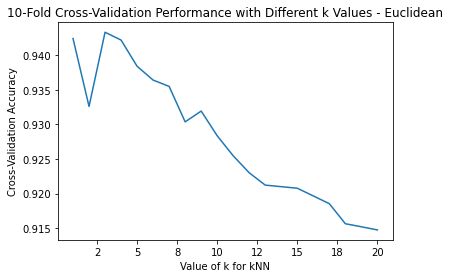

In [10]:
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.plot(k_range_euc, k_scores_euc)
plt.xlabel('Value of k for kNN')
plt.ylabel('Cross-Validation Accuracy')
plt.title('10-Fold Cross-Validation Performance with Different k Values - Euclidean') 
plt.show()
# Seems k=3 is the best case for Euclidean.

In [11]:
Euc = pd.concat([pd.DataFrame(k_range_euc),pd.DataFrame(k_scores_euc)],axis=1)
Euc.columns=['k_value','CV_accuracy']
Euc

,k_value,CV_accuracy
0,1,0.942427
1,2,0.932607
2,3,0.943338
3,4,0.942205
4,5,0.938419
5,6,0.936417
6,7,0.935506
7,8,0.930372
8,9,0.931935
9,10,0.928365


The best accuracy 0.943338 is obtained with k=3 for the Euclidean Case.

In [12]:
# Manhattan Case 
k_range_mnh = range(1, 21) # We will check k values between 1 and 20.
k_scores_mnh = []
for k in k_range_mnh:
    knn = KNeighborsClassifier(n_neighbors=k, p = 1, metric='minkowski')
    scores = cross_val_score(knn, df_train, Class_train, cv=kf, scoring='accuracy')
    k_scores_mnh.append(scores.mean())

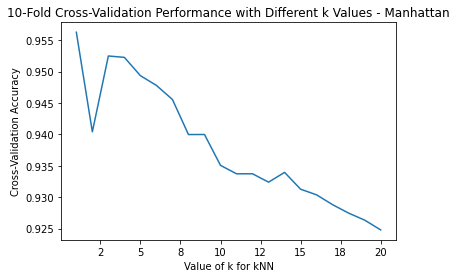

In [13]:
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.plot(k_range_mnh, k_scores_mnh)
plt.xlabel('Value of k for kNN')
plt.ylabel('Cross-Validation Accuracy')
plt.title('10-Fold Cross-Validation Performance with Different k Values - Manhattan') 
plt.show()
# Seems k=1 is the best case for Manhattan.

In [14]:
Mnh = pd.concat([pd.DataFrame(k_range_mnh),pd.DataFrame(k_scores_mnh)],axis=1)
Mnh.columns=['k_value','CV_accuracy']
Mnh

,k_value,CV_accuracy
0,1,0.956250
1,2,0.940400
2,3,0.952472
3,4,0.952250
4,5,0.949336
5,6,0.947788
6,7,0.945543
7,8,0.939968
8,9,0.939975
9,10,0.935061


The best accuracy 0.956250 is obtained with k=1 for the Manhattan case.

### Part B
Using the value of k (identified for each distance measure) in part (a) and evaluate your final
performance on the test data and present your results in a (8-by-8) confusion matrix, showing
the counts for actual and predicted labels. In addition, quote the runtime and accuracy for your
results.

In [15]:
#Euclidean

In [16]:
start_time = time.time()

In [17]:
knn_euc = KNeighborsClassifier(n_neighbors=3, p = 2, metric='minkowski') # k=3 for Euclidean

In [18]:
knn_euc.fit(df_train, Class_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
euc_test_score = knn_euc.score(df_test,Class_test)
euc_test_score # Euclidean's Score is found.

0.9438860971524288

In [20]:
euc_predicts = knn_euc.predict(df_test)
euc_predicts

array([5., 1., 4., ..., 6., 8., 4.])

In [21]:
# Created confusion matrix.
Confusion_euc = confusion_matrix(Class_test, euc_predicts)
Confusion_euc = pd.DataFrame(Confusion_euc)
Confusion_euc.columns = range(1,9)
Confusion_euc.index = Confusion_euc.index + 1
Confusion_euc = Confusion_euc.style.set_table_attributes("style='display:inline'").set_caption('Confusion Matrix(Euclidean)-Actual vs Predictions')
Confusion_euc
# Rows : Actual classes
# Columns : Predicted classes
# In general, it seems that predictions are reliable.

,1,2,3,4,5,6,7,8
1,431,0,0,2,0,4,0,0
2,1,449,0,0,0,0,2,0
3,2,0,413,0,15,20,4,0
4,7,0,0,370,60,6,0,7
5,3,0,6,1,422,1,0,0
6,6,0,7,15,28,392,1,0
7,0,0,1,0,0,0,446,0
8,0,0,0,1,1,0,0,458


In [22]:
print("--- %s seconds ---" % (time.time() - start_time)) # It has taken roughly 1 seconds for the Euclidean Case. 

--- 0.7457282543182373 seconds ---


In [23]:
#Manhattan

In [24]:
start_time = time.time()

In [25]:
knn_mnh = KNeighborsClassifier(n_neighbors=1, p = 1, metric='minkowski') # k=1 for Manhattan

In [26]:
knn_mnh.fit(df_train, Class_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [27]:
mnh_test_score = knn_mnh.score(df_test,Class_test)
mnh_test_score # Manhattan's Score is found.

0.954215522054718

In [28]:
mnh_predicts = knn_mnh.predict(df_test)
mnh_predicts

array([5., 1., 4., ..., 6., 8., 4.])

In [29]:
# Created confusion matrix.
Confusion_mnh = confusion_matrix(Class_test, mnh_predicts)
Confusion_mnh = pd.DataFrame(Confusion_mnh)
Confusion_mnh.columns = range(1,9)
Confusion_mnh.index = Confusion_mnh.index + 1
Confusion_mnh = Confusion_mnh.style.set_table_attributes("style='display:inline'").set_caption('Confusion Matrix(Manhattan)-Actual vs Predictions')
Confusion_mnh
# Rows : Actual classes
# Columns : Predicted classes
# In general, it seems that predictions are reliable.

,1,2,3,4,5,6,7,8
1,430,0,0,2,0,5,0,0
2,1,451,0,0,0,0,0,0
3,2,0,418,0,16,14,4,0
4,3,0,0,392,40,11,0,4
5,3,0,9,5,415,1,0,0
6,3,0,5,13,16,411,0,1
7,0,0,2,0,0,0,445,0
8,0,0,0,3,1,0,0,456


In [30]:
print("--- %s seconds ---" % (time.time() - start_time)) # It has taken roughly 7 seconds for the Manhattan Case.

--- 6.907262802124023 seconds ---


Above, it is found that the Euclidean test score is 0.9438860971524288 whereas the Manhattan test score is 0.954215522054718. 
Hence, we obtained the best performance with the Manhattan case when the number of nearest neighbors(k) is 1. Yet, there is no huge difference between accuracies of these two cases and Euclidean's computation time is much smaller compared to the Manhattan's. So, Euclidean may also be used.

### Part C
The observations from different axes are weighted equally if we compute the distance over each
axis and sum them to obtain a final similarity measure. Is this reasonable? For example, we can
compute the distance as below:
    
where DistX is the distance based on the acceleration only on X axis, DistY is for Y axis and so
on. Do you think weighting the distances over different axes to obtain a final similarity measure
makes sense for classification? Why?

Yes, it makes sense. This is a three dimensional data and accelaration information of each axes may not be equally important for the gesture(2D). So, weighting the distances over different axes is likely to increase our performance.

## Task 2 – Linear models on alternative representations of the data

Recall that most of the machine learning problems assume that we have a nice and informative
representation of the data (after data selection, preprocessing and transformation steps). In part (a), we
have preprocessed the information from each axis to obtain our feature vector (of 3T length which
keeps the information about X, Y and Z axis).

Suppose we are willing to perform a binary classification task to identify if a test time series is from
Class 3. As a reminder you can find the class definitions in Figure 1.

### Part A
Train a logistic regression model on the training data and use the model to make a prediction on the
test data. Note that you will obtain probabilistic predictions (i.e. probability of a time series being from
Class 3 if you encoded Class 3 as 1 in binary classification setting). This will require you to select a
threshold since 0.5 as a threshold may not work well under this imbalanced class setting. To make
things easier, use the ratio of Class 3 instances in the training data as threshold. Use the learned model
to predict the class for test data. Present your results in a (2-by-2) confusion matrix.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
threshold = len(Class_train[Class_train == 3.0]) / len(Class_train) # Determined the threshold
print("Threshold = ", threshold)

Threshold =  0.11830357142857142


In [33]:
Class_train_new = (Class_train == 3.0) # Created new class data for training set
Class_test_new = (Class_test == 3.0) # Created new class data for test set

In [34]:
# Creating the model.
log_reg_cl = LogisticRegression(max_iter=1500, penalty="none")

In [35]:
log_reg_cl.fit(df_train,Class_train_new)

LogisticRegression(max_iter=1500, penalty='none')

In [36]:
lg_prob_predicts = log_reg_cl.predict_proba(df_test) # Obtained probability predictions with logistic regression

In [37]:
lg_class_predicts = (lg_prob_predicts < threshold)[:, 0] # Obtained class predictions by using threshold

In [38]:
# Confusion Matrix
Confusion_lg = confusion_matrix(Class_test_new, lg_class_predicts)
Confusion_lg = pd.DataFrame(Confusion_lg)
Confusion_lg = Confusion_lg.style.set_table_attributes("style='display:inline'").set_caption('ConfusionMatrix')
Confusion_lg
# 0 corresponds to False (meaning it is not class 3)
# 1 corresponds to True (meaning it is class 3)
# Rows : Actual
# Columns : Predicted

,0,1
0,2957,171
1,167,287


In [39]:
print("F1_Score = ", f1_score(Class_test_new,lg_class_predicts))

F1_Score =  0.6293859649122807


In [40]:
print("Matthews_Corr_Coef = ", matthews_corrcoef(Class_test_new,lg_class_predicts))

Matthews_Corr_Coef =  0.5753317226123844


### Part B
An advantage of logistic regression is related to the interpretability however when we have large
number of features together with a method without penalization, it is harder to interpret the results.
Therefore, an alternative way is to train a logistic regression model with lasso penalties. This will
require you setting of penalization term (namely lambda). Use 10-fold cross-validation to determine
your ideal lambda level based on binomial deviance (Note that we have used accuracy as primary
metric to determine the lambda in class, however this strategy may not work well for the imbalanced
data). You can check http://www.inf.ed.ac.uk/teaching/courses/mlsc/Notes/Lecture4/MLSC_Lec4.pdf
for details of binomial deviance. This is also referred to as logistic loss. If you are using “glmnet”
package in R, “type.measure” can be set to “deviance” which is the default value. If you are Python
user, sklearn module has “LogisticRegressionCV” function in which you can provide the scorer as
“metrics.log_loss”.

Once you determine your best lambda value using 10-fold cross-validation, perform classification on
test data similar to part a and compare your results. Comment on the regression coefficients. Is there
any interesting information? Try to interpret the model.

In [41]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import log_loss

In [42]:
threshold = len(Class_train[Class_train == 3.0]) / len(Class_train)
print("Threshold = ", threshold)

Threshold =  0.11830357142857142


In [43]:
# Creating the model. l1 for lasso penalty, 10 for 10-fold cross validation, neg_log_loss for log_loss.
log_reg_cl_b = LogisticRegressionCV(cv=10, penalty="l1", scoring='neg_log_loss', max_iter=1500, solver="liblinear")

In [44]:
log_reg_cl_b.fit(df_train,Class_train_new)

LogisticRegressionCV(cv=10, max_iter=1500, penalty='l1', scoring='neg_log_loss',
                     solver='liblinear')

In [45]:
lg_prob_predicts_b = log_reg_cl_b.predict_proba(df_test)

In [46]:
lg_class_predicts_b = (lg_prob_predicts_b < threshold)[:, 0] 

In [47]:
log_loss_b = log_reg_cl_b.score(df_test,Class_test_new)
print("Neg. Log Loss = ", log_loss_b)

Neg. Log Loss =  -0.1255180072623896


In [48]:
pen_term = 1/log_reg_cl_b.C_
print("Penalization term = ", pen_term)

Penalization term =  [2.7825594]


In [49]:
# Confusion Matrix
Confusion_lg_b = confusion_matrix(Class_test_new, lg_class_predicts_b)
Confusion_lg_b = pd.DataFrame(Confusion_lg_b)
Confusion_lg_b = Confusion_lg_b.style.set_table_attributes("style='display:inline'").set_caption('ConfusionMatrix')
Confusion_lg_b
# 0 corresponds to False (meaning it is not class 3)
# 1 corresponds to True (meaning it is class 3)
# Rows : Actual
# Columns : Predicted

,0,1
0,3125,3
1,255,199


In [50]:
print("F1_Score = ", f1_score(Class_test_new,lg_class_predicts_b))

F1_Score =  0.6067073170731708


In [51]:
print("Matthews_Corr_Coef = ", matthews_corrcoef(Class_test_new,lg_class_predicts_b))

Matthews_Corr_Coef =  0.6307731347909782


Compared to Part A, we have slightly smaller F1 Score in the penalized version of logistic regression. Yet, Matthews CorrCoeff is higher for the Part B. Hence, it is possible to say that these two models demonstared similar performances. Since F1 scores are too close to each other we can say that the model in Part B is slightly better.

### Part C
An alternative way to represent the feature matrix on a new space to introduce nonlinear relations is
to use distance matrix as a feature matrix. For example, we have 896 training instances and the
observations over time are used as features in the previous tasks (i.e. we worked on N by 3T matrix).
Recall that multidimensional scaling also works on distance matrices and we have mentioned that it can
handle nonlinear relations (Homework 2 also aims at revealing such an information). This non-linearity
stems from the use of Euclidean distances. Use of Euclidean distance as input to a learning algorithm
allows for handling nonlinear relations*. In other words, your features keep the nonlinear information.

Given this information, you are expected to transform your training data to distance information (i.e. N
by N matrix). Note that you need to perform a similar transformation to your test data. In other words,
you need to calculate the distance of each test instance to training instance to obtain a distance based
representation for your test data. This will be an Ntest by N matrix (Ntest refers to the number of test
instances) where each entry (i,j) refers to the distance of test time series i to the training time series j.
You can use Euclidean distance as your distance measure.

Perform the same training and test strategy as in part b but use the distances as your new feature
matrices. Comment on the regression coefficients. What do they imply under this new representation
setting?

In [52]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import log_loss

In [53]:
df_train_dist = pd.DataFrame(euclidean_distances(df_train)) # Distances between training data set instances
df_test_dist = pd.DataFrame(euclidean_distances(df_test, df_train)) # Distances between training and test data set instances

In [54]:
threshold = len(Class_train[Class_train == 3.0]) / len(Class_train)
print("Threshold = ", threshold)

Threshold =  0.11830357142857142


In [55]:
# Creating the model. l1 for lasso penalty, 10 for 10-fold cross validation, neg_log_loss for log_loss.
log_reg_cl_c = LogisticRegressionCV(cv=10, penalty="l1", scoring='neg_log_loss', max_iter=1500, solver="liblinear")

In [56]:
log_reg_cl_c.fit(df_train_dist,Class_train_new)

LogisticRegressionCV(cv=10, max_iter=1500, penalty='l1', scoring='neg_log_loss',
                     solver='liblinear')

In [57]:
lg_prob_predicts_c = log_reg_cl_c.predict_proba(df_test_dist)

In [58]:
lg_class_predicts_c = (lg_prob_predicts_c < threshold)[:, 0] 

In [59]:
log_loss_c = log_reg_cl_c.score(df_test_dist,Class_test_new)
print("Neg. Log Loss = ", log_loss_c)

Neg. Log Loss =  -0.04814034470571897


In [60]:
pen_term = 1/log_reg_cl_c.C_
print("Penalization term = ", pen_term)

Penalization term =  [0.35938137]


In [61]:
# Confusion Matrix
Confusion_lg_c = confusion_matrix(Class_test_new, lg_class_predicts_c)
Confusion_lg_c = pd.DataFrame(Confusion_lg_c)
Confusion_lg_c = Confusion_lg_c.style.set_table_attributes("style='display:inline'").set_caption('ConfusionMatrix')
Confusion_lg_c
# 0 corresponds to False (meaning it is not class 3)
# 1 corresponds to True (meaning it is class 3)
# Rows : Actual
# Columns : Predicted

,0,1
0,3122,6
1,100,354


Confusion matrix is better than the ones we obtained in Part A and B.

In [62]:
print("F1_Score = ", f1_score(Class_test_new,lg_class_predicts_c))

F1_Score =  0.8697788697788698


In [63]:
print("Matthews_Corr_Coef = ", matthews_corrcoef(Class_test_new,lg_class_predicts_c))

Matthews_Corr_Coef =  0.8606468900872686


It is obvious that we have larger F1 Score and Matthews_CorrCoef in part C, which means that using Euclidean distances in penalized logistic regression provides better results. 

In [64]:
coeffs = log_reg_cl_c.coef_.flatten()

In [65]:
print("Sum of Coefficients (for Class 3) = ", np.sum(coeffs[Class_train_new == 1.0]))

Sum of Coefficients (for Class 3) =  -4.253260605593822


In [66]:
print("Number of nonzero Entries (for Class 3) = ", np.sum(coeffs[Class_train_new == 1.0] != 0))

Number of nonzero Entries (for Class 3) =  104


In [67]:
print("Sum of Coefficients (except Class 3) = ", np.sum(coeffs[Class_train_new != 1.0]))

Sum of Coefficients (except Class 3) =  4.043947297158291


In [68]:
print("Number of nonzero Entries (except Class 3) = ", np.sum(coeffs[Class_train_new != 1.0] != 0))

Number of nonzero Entries (except Class 3) =  519


As said before, this model performs much better compared to the models in part A and part B. 
It is seen that regression coefficients are generally negative for Class 3, whereas they are mostly positive except the case of Class 3.

### Part D
Provide an overall comparison on the results you obtain for each part (over all tasks). You can
compare test accuracy of each alternative method you developed.

#### Logistic Regression Model Results (Part A)

In [69]:
print("F1_Score = ", f1_score(Class_test_new,lg_class_predicts))

F1_Score =  0.6293859649122807


In [70]:
print("Matthews_Corr_Coef = ", matthews_corrcoef(Class_test_new,lg_class_predicts))

Matthews_Corr_Coef =  0.5753317226123844


#### Logistic Regression Model with Lasso Penalties Results (Part B)

In [71]:
print("F1_Score = ", f1_score(Class_test_new,lg_class_predicts_b))

F1_Score =  0.6067073170731708


In [72]:
print("Matthews_Corr_Coef = ", matthews_corrcoef(Class_test_new,lg_class_predicts_b))

Matthews_Corr_Coef =  0.6307731347909782


#### Logistic Regression Model with Lasso Penalties and Euclidean Distances Data Results (Part C)

In [73]:
print("F1_Score = ", f1_score(Class_test_new,lg_class_predicts_c))

F1_Score =  0.8697788697788698


In [74]:
print("Matthews_Corr_Coef = ", matthews_corrcoef(Class_test_new,lg_class_predicts_c))

Matthews_Corr_Coef =  0.8606468900872686


As mentioned before, we obtained the best prediction performance when we constructed logistic regression model with lasso penalties
and euclidean distances data. This case has comparatively higher F1 score and Matthews CorrCoef values.

In [75]:
os.system('jupyter nbconvert --to html HW3_Final.ipynb')

0